# 1-deep-learning-from-scratch-pytorch

## Machine learning: classification

State the challenge of classification and give an example of building an ML algo using scikit-learn.

Hit the following points:

* ML algos require both training data *and* an optimization metric
* train test split
* overfitting//underfitting
* data science, ML, and AI consolidate and re-arrange power structures: they're cultural, economic, and social tools, as well as technical tools. Also: who chooses the classification scheme, the columns, the rows?

## Machine Learning: regression

Machine learning where the target is a continuous variable.

# Neural networks

- ML models inspired by biological neural networks.
- Good for image classification, NLP, and more.


![title](../img/george.jpg)

Image from [here](https://www.pnas.org/content/116/4/1074/tab-figures-data).

When making predictions with neural networks, we use a procedure called **forward propagation**. When training neural networks (that is, finding the optimal weights), we use a procedure called **back propogation**. So let's first jump into forward propogation!

## Forward propogation

### Single-layer perceptron

First example is the single layer perceptron (SLP). [Include image].
The parameters that change when we train the model are the weights.
Check it out on randomly generated data.
The model is $y = w\cdot x + b $ (vectors).
Following image is from [here](https://deepai.org/machine-learning-glossary-and-terms/perceptron) (can make our own or cite this).

![title](../img/perceptron.jpg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
x = np.random.rand(5) - 0.5 # one training data point, 5 features/columns
w = np.random.normal(size=5) # weights, one for each feature
b = 0 # bias/offset
y = np.dot(x, w) + b
print(y)

0.07513846803825697


This is a regressor.

For classification, you can threshold it, e.g.:

In [2]:
z = np.sign(y)
z

1.0

You can also turn it into a logistic regression classifier:

In [3]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

z = int(sigmoid(y) < 0.5)
z

0

### SLP For many data points

In [4]:
# generate more data points
x = np.random.rand(5, 5) - 0.5
# SLP for regression
w = np.random.normal(size=5)
y = np.dot(x, w) + b
y

array([-0.59553593, -0.1318721 ,  0.15183036, -0.45237007, -1.00372881])

In [5]:
#SLP for classification
z = np.sign(y)
z

array([-1., -1.,  1., -1., -1.])

In [6]:
# Logreg
z = (sigmoid(y) < 0.5).astype(int)
z

array([1, 1, 0, 1, 1])

### Multilayer perceptron

NNs have hidden layers (between input and output). Lets add one layer! Image from [here](https://www.researchgate.net/figure/A-hypothetical-example-of-Multilayer-Perceptron-Network_fig4_303875065)

![title](../img/mlp.png)

Notes:
* Each of the 5 node in 1st hidden layer has 5 inputs so it will have a 5 x 5 array for weights
* The output layer has one node and 5 inputs so will have a 5 x 1 array of weights

In [7]:
x = np.random.rand(5) - 0.5 # generate data
w1 = np.random.normal(size=(5, 5)) # weights for hidden layer
w2 = np.random.normal(size=(5, 1)) # weights for output layer
b1 = np.random.normal(size=(1, 5))
b2 = np.random.normal(size=(1, 1))

In [8]:
y1 = x @ w1 + b1
print(y1)
y2 = y1 @ w2 + b2
print(y2)
#g1 = relu(z1)

[[-1.52174402 -1.4221002  -0.82192992 -0.267163    0.68667685]]
[[0.01063195]]


Note that we've essentially just concatenated two linear operations so we still only have a linear regression! If the problem is non-linear, this won't be much use. To deal with non-linearities, we use activation functions.

### Activation functions

Common activation functions are relu, sigmoid, and tanh. We've seen sigmoid. numpy has `np.tanh`. Relu is

In [9]:
def relu(x):
    return np.maximum(0,x)

[Plot these, HBA]

Use relu now for 10 data points and one hidden layer with 8 nodes:

In [10]:
# for many data points
x = np.random.rand(10, 5) - 0.5
w1 = np.random.normal(size=(5, 8))
w2 = np.random.normal(size=(8, 1))


In [11]:
y1 = x @ w1
z1 = relu(y1)
z1.shape

(10, 8)

In [12]:
z2 = y1 @ w2
z2

array([[ 1.4606266 ],
       [ 2.57788516],
       [ 2.45776696],
       [-2.32933383],
       [-0.29508433],
       [-2.52157464],
       [ 2.43414271],
       [-4.21985907],
       [-4.27939732],
       [ 0.65706403]])

### Deeper Networks

Now we'll build a regressor with 4 hidden layers

In [13]:
x = x = np.random.rand(8, 10) - 0.5
n = 4 # number of hidden layers
weights = {}
for i in range(n):
    #print(f"weights_{i}")
    weights[i] = np.random.normal(size=(10, 10))
weights[n] = np.random.normal(size=(10, 1))
weights[0]

array([[ 1.55329405, -0.55451408,  0.31975102,  1.46229887, -0.71778719,
         0.86041681, -1.37197404, -1.26163182,  0.68761017,  1.15185618],
       [ 0.31342245, -1.73698619, -0.55657172,  2.03809364, -0.32349203,
        -0.12299315, -0.03488666,  1.612478  ,  1.07804918,  0.10172547],
       [ 1.267942  , -0.64351151,  0.48088209, -0.70743968,  0.88148067,
        -0.23923243, -0.49666807, -0.53271716,  1.80072295, -0.844124  ],
       [ 0.81227717,  0.87454471, -0.7483233 ,  0.62293174, -0.40573389,
         0.93923559,  0.16097881,  0.54836976,  0.59832647,  0.94773392],
       [ 0.79335681,  0.17413848,  1.33426644,  0.43797411, -0.87144443,
         1.71156982, -0.44657354,  0.51455819,  1.27907102, -0.40474917],
       [ 1.52607224, -0.3354502 , -0.69969128, -1.69412501,  0.45686579,
         0.5185327 ,  0.11676989,  0.24172116,  0.51499922,  1.90208871],
       [-1.01126395,  0.98923742, -1.87990266,  0.8096087 ,  0.91669003,
        -1.63774028, -0.33084419,  0.67481669

In [14]:
# forward propogation

for i in range(n):
    y = relu(x @ weights[0])
    y = relu(y @ weights[i+1])
y # edit final layer, HBA

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

## Representation learning

* Add some notes // thoughts on forward propogation and representation learning :)

## Back propagation

Back propagation is the algorithm used to optimize the weights of neural networks. Before jumping into back prop, let's first check out how gradient descent can be used to optimize the weights of perceptrons.

## Gradient descent

Now we know how to use forward propogation to make predictions, it's time to think about how to train a neural network! That is, how we determine the best model parameters. Reminder: our NN model parameters are the weights and biases.

We want to minimize the difference between the target variable $y$ and the prediction made by our forward propagation algorithm. So after a forward pass, we use *gradient descent* to change the weights and then do another forward pass and see if we have improved our predictions.

[include gradient descent image; something like this: https://www.google.com/search?q=gradient+descent&sxsrf=ALeKk00BkP9cVptRdHb7ud9SBaUc1VlSHg:1592047263771&source=lnms&tbm=isch&sa=X&ved=2ahUKEwixoP2c1v7pAhVGzjgGHdwICqAQ_AUoAXoECBMQAw&biw=1680&bih=880#imgrc=hYvKSF67IoYy_M]

### Gradient Descent and the Single Layer Perceptron

[include SLP image again]

In [15]:
# write SLP function
def slp(x, w, b):
    y = x @ w + b
    return y

In [16]:
# for single data point
x = np.random.rand(1, 5) - 0.5 # generate data
b = 0
w = np.random.normal(size=5) # initialize weights
y = np.random.normal(10)
y_hat = slp(x, w, b)
w

array([-0.23216757, -1.15635489,  1.01242202,  0.15886797, -0.36835437])

* Discuss how we want to shift each weight slightly in a direction that will improve the prediction *so* we look at how bad the prediction was (prediction minus actual value), take the dot product with the relevant xs, and multiply by the learning rate (which we set and this decides how drastic the changes to the weights will be; an image will help explain this).
* also note that if the prediction is correct, then y_hat - y is zero and there's no change at all.
* note that we're updating all weights simultaneously also

In [17]:
# gradient descent
y_hat = slp(x, w, b)
learning_rate = 0.1
delta_w = learning_rate*((y_hat - y) * x)
delta_b = learning_rate*(y_hat - y) 
#print(delta_w)
w = (w + delta_w).reshape(5)
b = b + delta_b

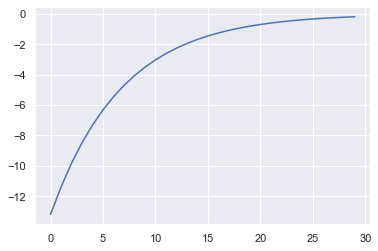

In [18]:
# define some lists to plot y_hat - y as we iterate
diff = list()
for _ in range(30):
    y_hat = slp(x, w, b)
    diff.append(y_hat - y)
    # gradient descent
    learning_rate = 0.1
    delta_w = learning_rate*((y_hat - y) * x)
    delta_b = learning_rate*(y_hat - y) 
    #print(delta_w)
    w = (w - delta_w).reshape(5)
    b = b - delta_b
    #print(y_hat - y)
plt.plot(diff);

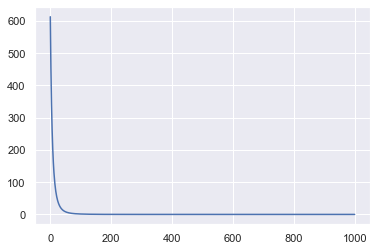

In [19]:
# many data points
x = np.random.rand(5, 5) - 0.5
w = np.random.normal(size=5)
b = 0.1
diff = list()
for _ in range(1000):
    y_hat = slp(x, w, b)
    diff.append((y_hat - y)@(y_hat - y))
    learning_rate = 0.1
    delta_w = learning_rate*((y_hat - y) @ x)
    #print(delta_w)
    w = (w - delta_w).reshape(5)
plt.plot(diff);

## Back propagation

In [20]:
# https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html
# https://machinelearningmastery.com/neural-networks-crash-course/
# https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/